# Map watertagged regions for RCP8.5 2100

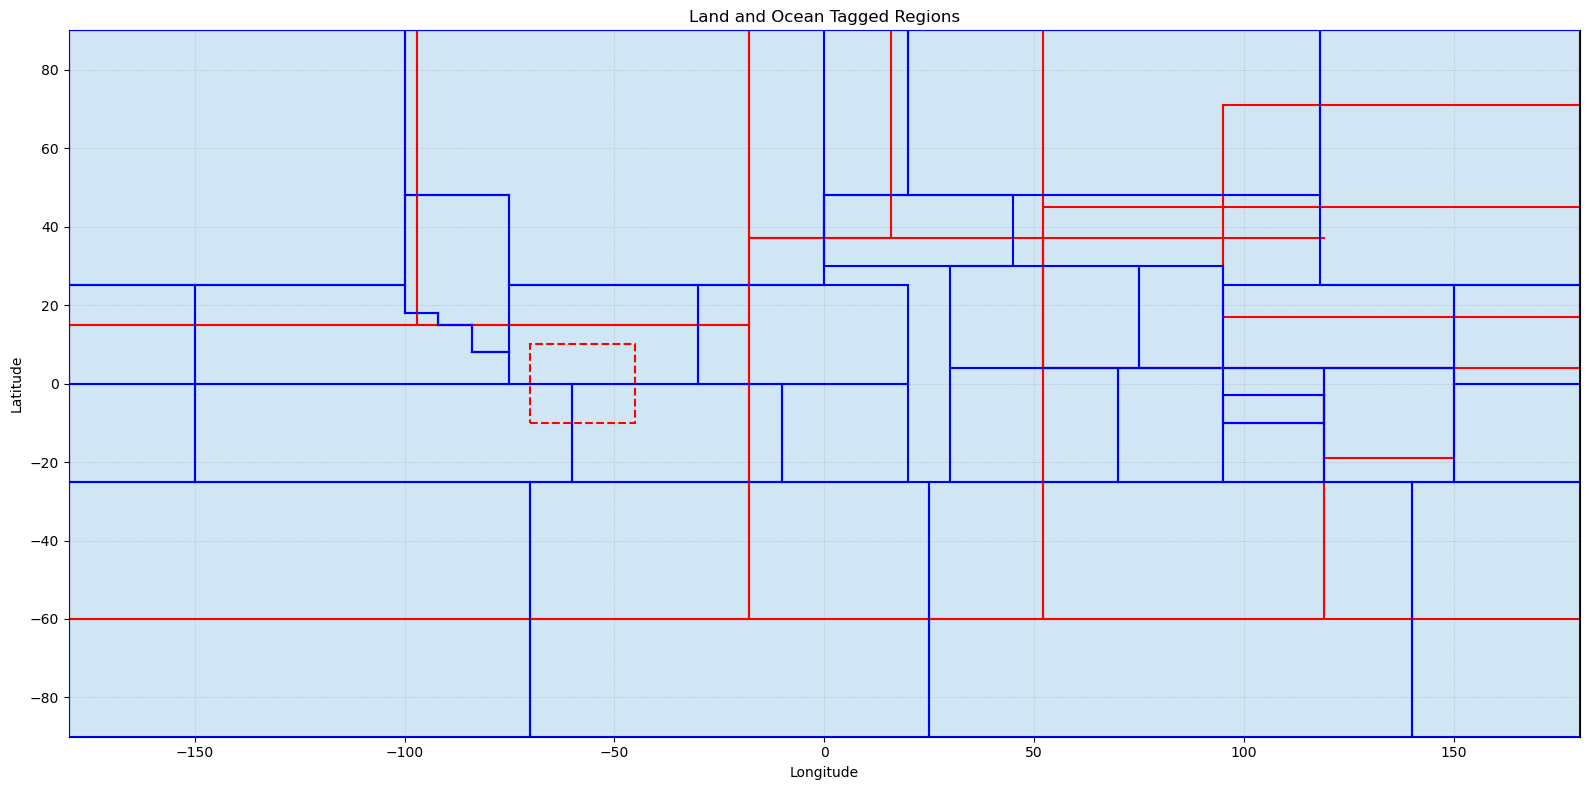

In [4]:
import matplotlib.pyplot as plt
import sys
sys.path.append('/glade/u/home/aflaim/ESMplot')
from ESMplot.watertagging.tagged_regions_RCP85 import draw_land_tags_rcp85,draw_ocean_tags_rcp85

# Create a world map figure and axis
fig, ax = plt.subplots(figsize=(16, 8))
ax.set_xlim(-180, 180)
ax.set_ylim(-90, 90)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Land and Ocean Tagged Regions')

# Optional: Add a light background for land/ocean
ax.set_facecolor('#d0e6f5')  # light blue ocean
ax.grid(True, which='both', linestyle=':', linewidth=0.5)

# Set up border style parameters
line_width = 1.5
major_style = '-'
minor_style = '--'
color = 'red'
zorder = 3

# Draw all land tags (tags 0–12)
for i in range(13):
    draw_land_tags_rcp85(i, ax, line_width, major_style, minor_style, color, zorder)

# Draw all ocean tags (tags 13–39)
for i in range(13, 40):
    draw_ocean_tags_rcp85(i, ax, line_width, major_style, minor_style, 'blue', zorder)

# Finalize and show the plot
plt.tight_layout()
plt.show()


In [4]:
range(14, 40)

range(14, 40)

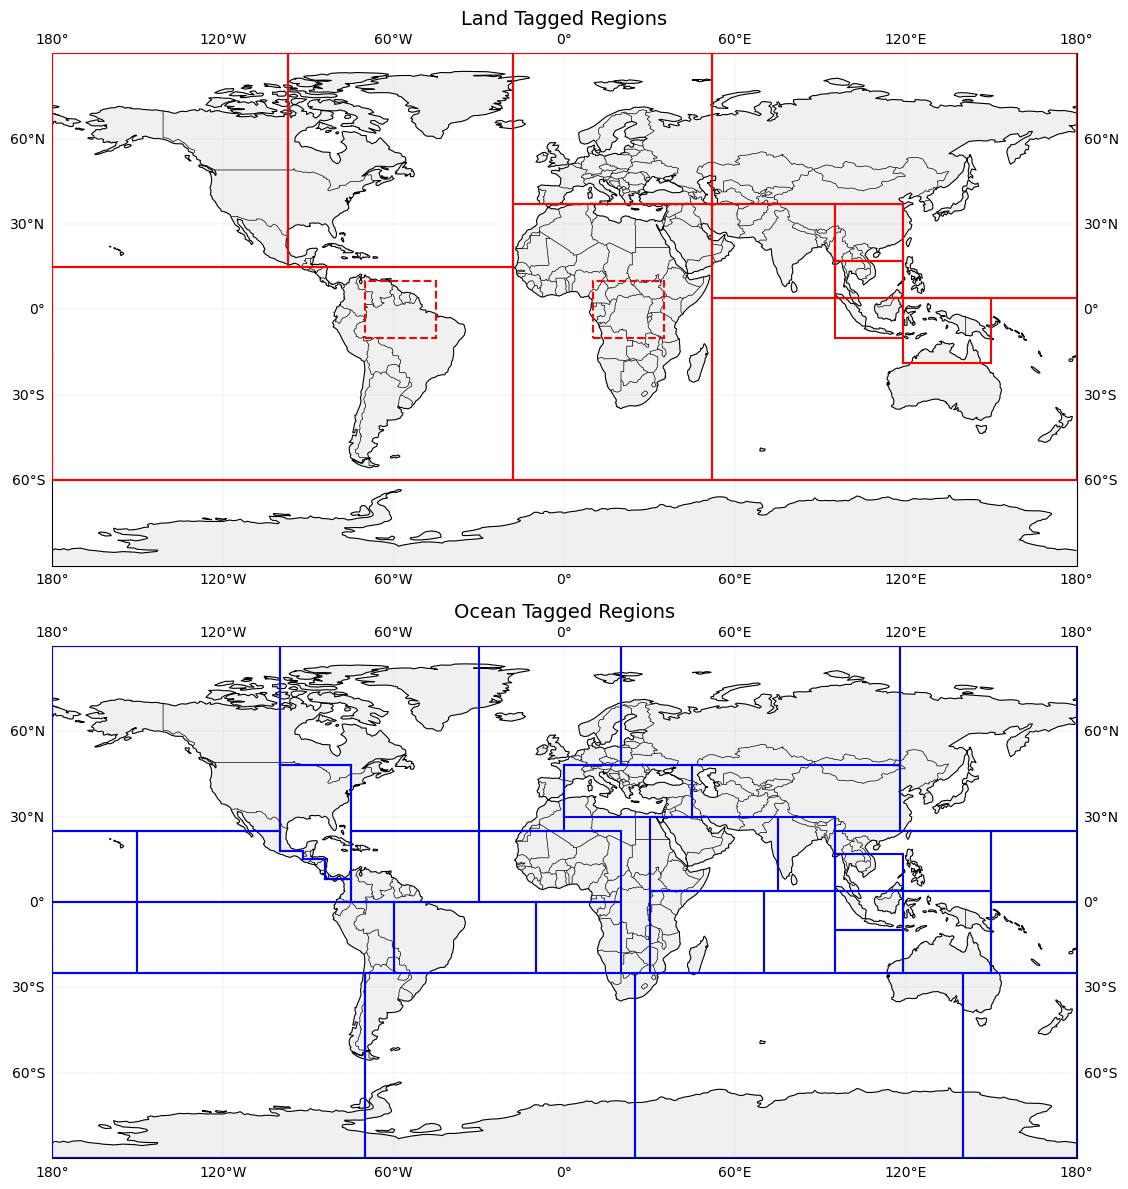

In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import sys
sys.path.append('/glade/u/home/aflaim/ESMplot')

from ESMplot.watertagging.tagged_regions_RCP85 import draw_land_tags, draw_ocean_tags

# Setup figure with two panels (land top, ocean bottom)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12),
                               subplot_kw={'projection': ccrs.PlateCarree()})
for ax in [ax1, ax2]:
    ax.set_global()
    ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())
    ax.coastlines(resolution='110m', linewidth=0.8)
    ax.add_feature(cfeature.BORDERS, linewidth=0.5)
    ax.add_feature(cfeature.LAND, facecolor='#f0f0f0', zorder=0)
    ax.gridlines(draw_labels=True, linewidth=0.3, linestyle=':')

# Style parameters
line_width = 1.5
major_style = '-'
minor_style = '--'
zorder = 5

# Plot land tags in top panel
for i in range(14):
    draw_land_tags(i, ax1, line_width, major_style, minor_style, 'red', zorder)

# Plot ocean tags in bottom panel
for i in range(14, 40):
    draw_ocean_tags(i, ax2, line_width, major_style, minor_style, 'blue', zorder)

# Set titles
ax1.set_title("Land Tagged Regions", fontsize=14)
ax2.set_title("Ocean Tagged Regions", fontsize=14)

# Adjust layout
plt.tight_layout()
plt.show()


# Testing individual region definitions

In [41]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.lines as lines

## Europe

In [ ]:
def plot_test_patch(rlats, rlatn, rlonw, rlone,
                    lw=2, linestyle='-', color='red', zorder=5):
    fig, ax = plt.subplots(figsize=(12, 6), subplot_kw={'projection': ccrs.PlateCarree()})
    
    # Set map extent and features
    ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())
    ax.coastlines(resolution='110m', linewidth=0.8)
    ax.add_feature(cfeature.BORDERS, linewidth=0.5)
    ax.add_feature(cfeature.LAND, facecolor='#f0f0f0', zorder=0)
    ax.gridlines(draw_labels=True, linewidth=0.3, linestyle=':')

    # Compute width and height with crossing checks
    dx = abs(rlone - rlonw) if (rlone * rlonw >= 0) else abs(rlone) + abs(rlonw)
    dy = abs(rlatn - rlats) if (rlatn * rlats >= 0) else abs(rlatn) + abs(rlats)

    # Draw the rectangle
    ax.add_patch(Rectangle((rlonw, rlats), dx, dy,
                           transform=ccrs.PlateCarree(),
                           facecolor='none', edgecolor=color,
                           linestyle=linestyle, linewidth=lw,
                           zorder=zorder))

    ax.set_title("Tagged Region Test", fontsize=14)
    plt.tight_layout()
    plt.show()

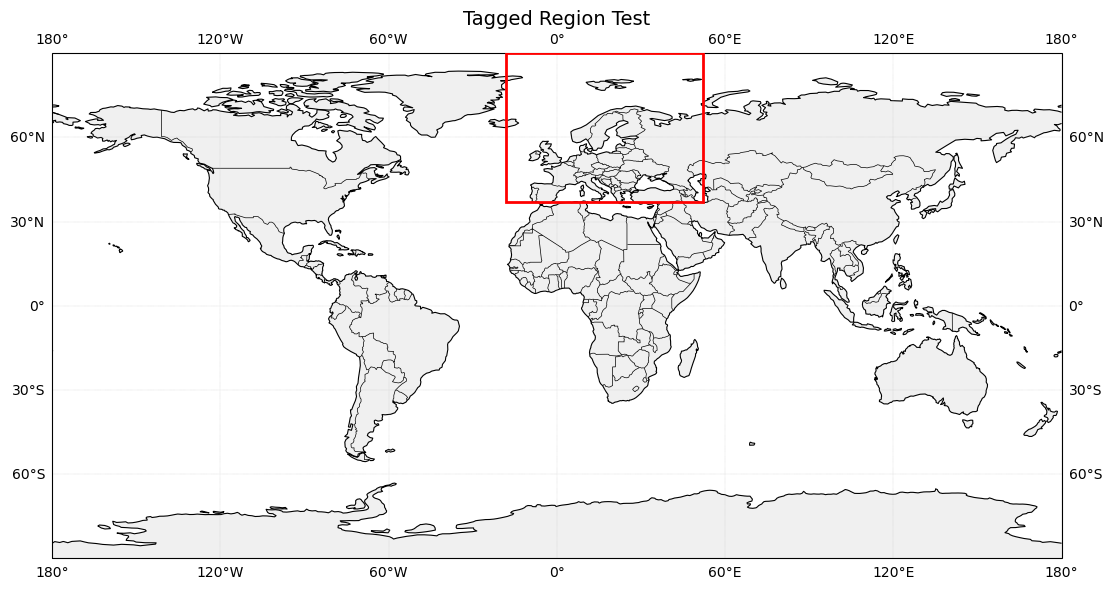

In [4]:
plot_test_patch(rlats=37, rlatn=90, rlonw=-18, rlone=52)

## NASA

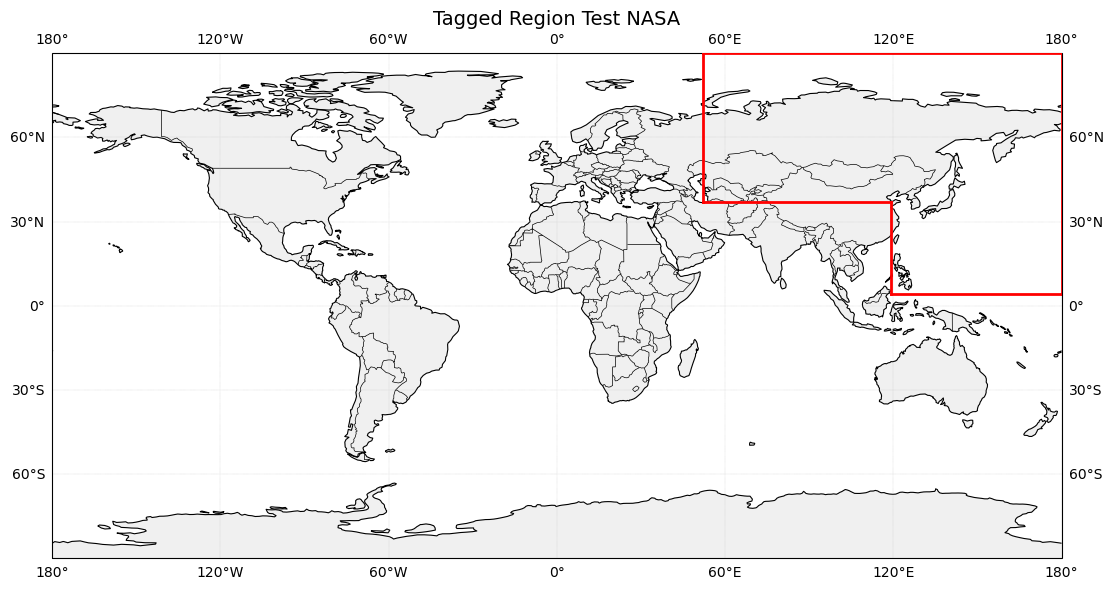

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# Set map extent and features
ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())
ax.coastlines(resolution='110m', linewidth=0.8)
ax.add_feature(cfeature.BORDERS, linewidth=0.5)
ax.add_feature(cfeature.LAND, facecolor='#f0f0f0', zorder=0)
ax.gridlines(draw_labels=True, linewidth=0.3, linestyle=':')

major = "-"
lw = 2
color='red'
zorder=5

# NASA
rlats = 37   # Western border 1
rlatn = 90 
rlonw = 52 
rlone = 52 
ax.add_line(lines.Line2D([rlonw,rlone],[rlats,rlatn],linestyle=major,color=color,lw=lw,zorder=zorder))
rlats = 4   # Western border 2
rlatn = 37 
rlonw = 119 
rlone = 119 
ax.add_line(lines.Line2D([rlonw,rlone],[rlats,rlatn],linestyle=major,color=color,lw=lw,zorder=zorder))
rlats = 4    # Eastern border
rlatn = 90
rlonw = 180 
rlone = 180 
ax.add_line(lines.Line2D([rlonw,rlone],[rlats,rlatn],linestyle=major,color=color,lw=lw,zorder=zorder))
rlats = 37    # Southern border part 1
rlatn = 37 
rlonw = 52 
rlone = 119 
ax.add_line(lines.Line2D([rlonw,rlone],[rlats,rlatn],linestyle=major,color=color,lw=lw,zorder=zorder))
rlats = 4    # Southern border part 2
rlatn = 4  
rlonw = 119 
rlone = 180
ax.add_line(lines.Line2D([rlonw,rlone],[rlats,rlatn],linestyle=major,color=color,lw=lw,zorder=zorder))
rlats = 90    # Northern border
rlatn = 90  
rlonw = 52
rlone = 180
ax.add_line(lines.Line2D([rlonw,rlone],[rlats,rlatn],linestyle=major,color=color,lw=lw,zorder=zorder))

ax.set_title("Tagged Region Test NASA", fontsize=14)
plt.tight_layout()
plt.show()

## SASA

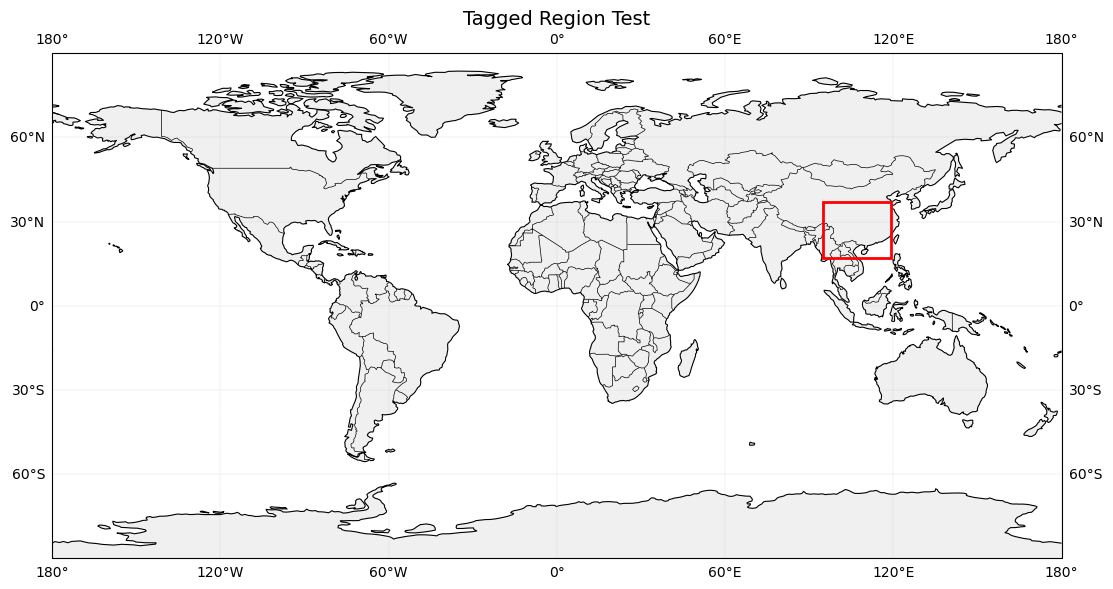

In [16]:
# 8. Southeast Asia
rlats = 17
rlatn = 37
rlonw = 95
rlone = 119

plot_test_patch(rlats=rlats, rlatn=rlatn, rlonw=rlonw, rlone=rlone)

## SLCB

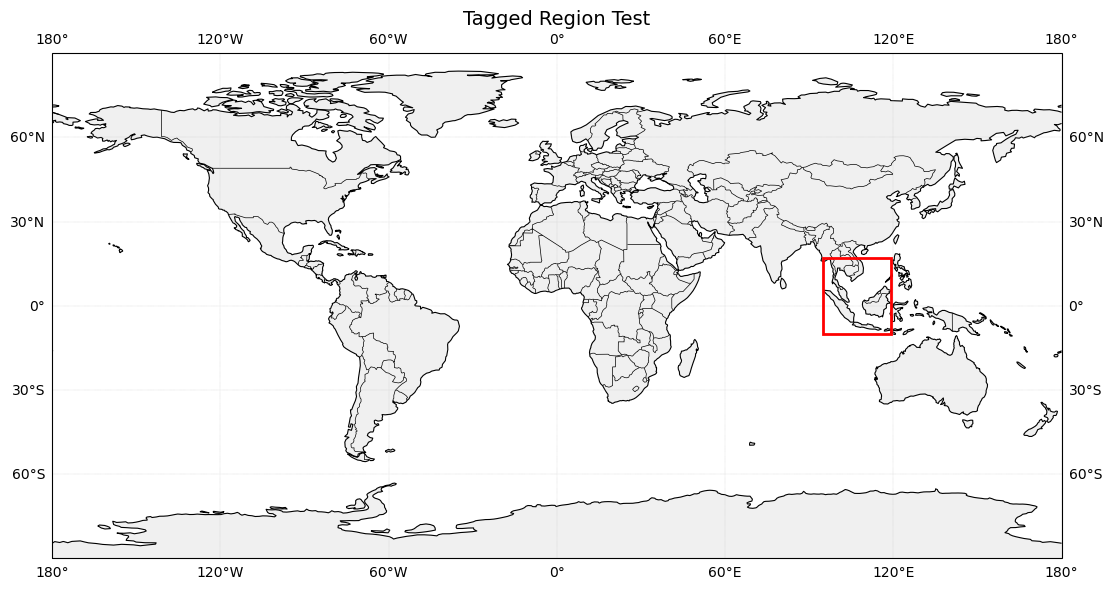

In [17]:
# 10. Sundaland combined 
rlats = -10
rlatn = 17
rlonw = 95  #-180
rlone = 119 #-180

plot_test_patch(rlats=rlats, rlatn=rlatn, rlonw=rlonw, rlone=rlone)

## INDA

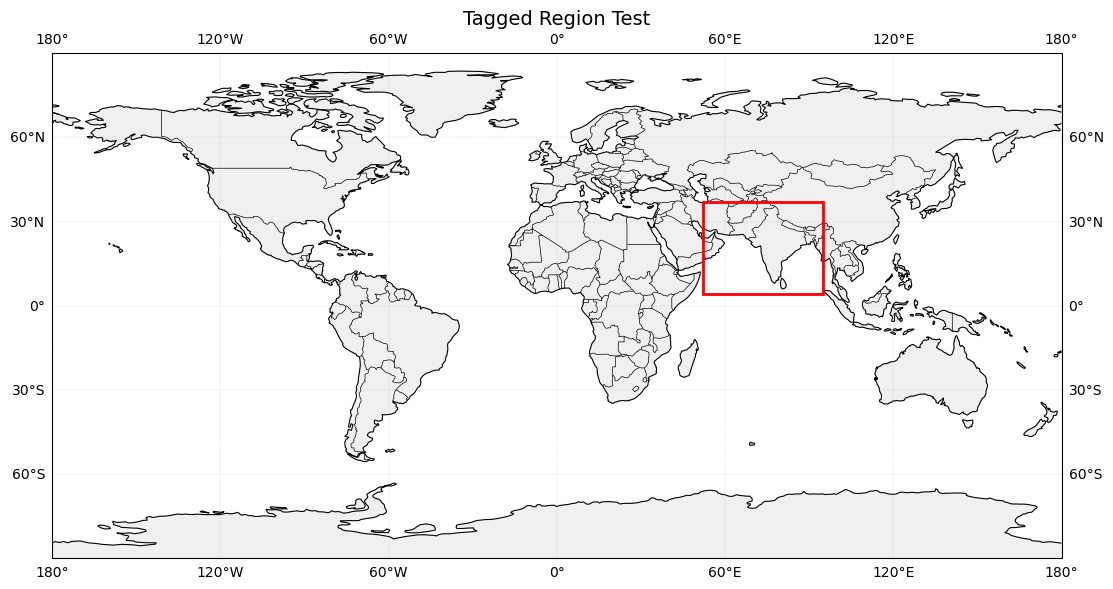

In [18]:
# 7. India
rlats = 4
rlatn = 37
rlonw = 52
rlone = 95

plot_test_patch(rlats=rlats, rlatn=rlatn, rlonw=rlonw, rlone=rlone)

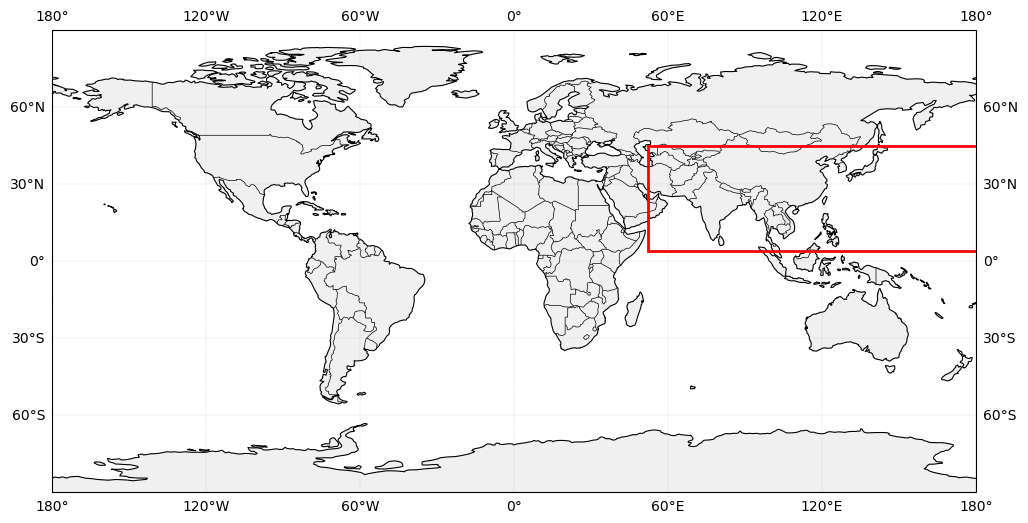

In [20]:
fig, ax = plt.subplots(figsize=(12, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# Set map extent and features
ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())
ax.coastlines(resolution='110m', linewidth=0.8)
ax.add_feature(cfeature.BORDERS, linewidth=0.5)
ax.add_feature(cfeature.LAND, facecolor='#f0f0f0', zorder=0)
ax.gridlines(draw_labels=True, linewidth=0.3, linestyle=':')

major = "-"
lw = 2
color='red'
zorder=5

# 7. India
rlats = 4
rlatn = 37
rlonw = 52
rlone = 95
ax.add_patch(Rectangle((rlonw,rlats),abs(abs(rlonw)+abs(rlone)),abs(abs(rlatn)+abs(rlats)),
              linestyle=major,facecolor='none',edgecolor=color,linewidth=lw,zorder=zorder))

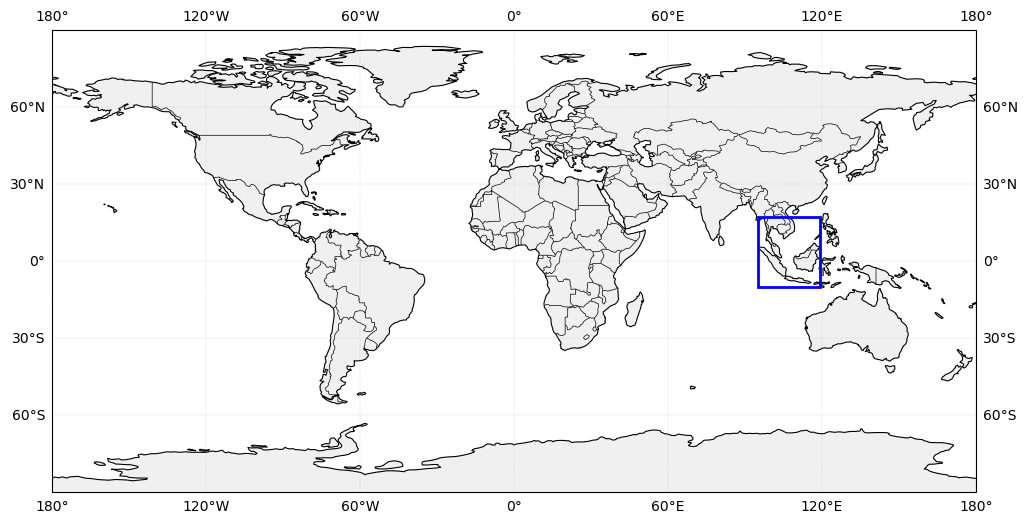

In [6]:
fig, ax = plt.subplots(figsize=(12, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# Set map extent and features
ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())
ax.coastlines(resolution='110m', linewidth=0.8)
ax.add_feature(cfeature.BORDERS, linewidth=0.5)
ax.add_feature(cfeature.LAND, facecolor='#f0f0f0', zorder=0)
ax.gridlines(draw_labels=True, linewidth=0.3, linestyle=':')

major = "-"
lw = 2
color='blue'
zorder=5

dx = abs(rlone - rlonw) if (rlone * rlonw >= 0) else abs(rlone) + abs(rlonw)
dy = abs(rlatn - rlats) if (rlatn * rlats >= 0) else abs(rlatn) + abs(rlats)
# Draw the rectangle
ax.add_patch(Rectangle((rlonw, rlats), dx, dy,
                       transform=ccrs.PlateCarree(),
                       facecolor='none', edgecolor=color,
                       linestyle=major, linewidth=lw,
                       zorder=zorder))

# Map watertag output including region boxes

In [2]:
# Use xesmf_gridfill environment
import matplotlib.pyplot as plt
import matplotlib as mpl
import cartopy.crs as ccrs
import numpy as np
import xarray as xr
#import xesmf as xe
#import cartopy
#import cartopy.crs as ccrs
import cartopy.feature as cfeature
import scipy
#from gridfill import fill
#from scipy.interpolate import griddata
import calendar
import cftime
import pandas as pd

In [82]:
filepath = "/glade/derecho/scratch/aflaim/iCESM_testcases/f.ie12.BRCP85C5CN.f19_g16.LME.004_2100watertags.001/run/f.ie12.BRCP85C5CN.f19_g16.LME.004_2100watertags.001.cam.h0.2100-02.nc"
ds = xr.open_dataset(filepath).PRECRC_TANEr[0,:,:]

In [76]:
ds

<xarray.DataArray 'PRECRC_TANEr' (lat: 96, lon: 144)>
[13824 values with dtype=float32]
Coordinates:
    time     object 2100-03-01 00:00:00
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Attributes:
    units:         m/s
    long_name:     Convective rain rate for TANEr
    cell_methods:  time: mean

In [78]:
da = ds
if 'time' in da.dims:
    # Handle vectorized days_in_month for cftime
    days_per_month = xr.DataArray(
        [t.daysinmonth for t in da.time.values],
        coords={'time': da.time},
        dims='time'
    )
    seconds_per_month = days_per_month * 24 * 60 * 60
    da_mm_month = da * 1000 * seconds_per_month
else:
    # Single time value
    days_in_month = da.time.values.item().daysinmonth
    seconds_in_month = days_in_month * 24 * 60 * 60
    da_mm_month = da * 1000 * seconds_in_month

da_mm_month.attrs['units'] = 'mm/month'

In [79]:
np.min(ds)

<xarray.DataArray 'PRECRC_TANEr' ()>
array(-1.52903786e-27)
Coordinates:
    time     object 2100-03-01 00:00:00

In [80]:
np.min(da_mm_month)

<xarray.DataArray 'PRECRC_TANEr' ()>
array(-4.09537498e-18)
Coordinates:
    time     object 2100-03-01 00:00:00

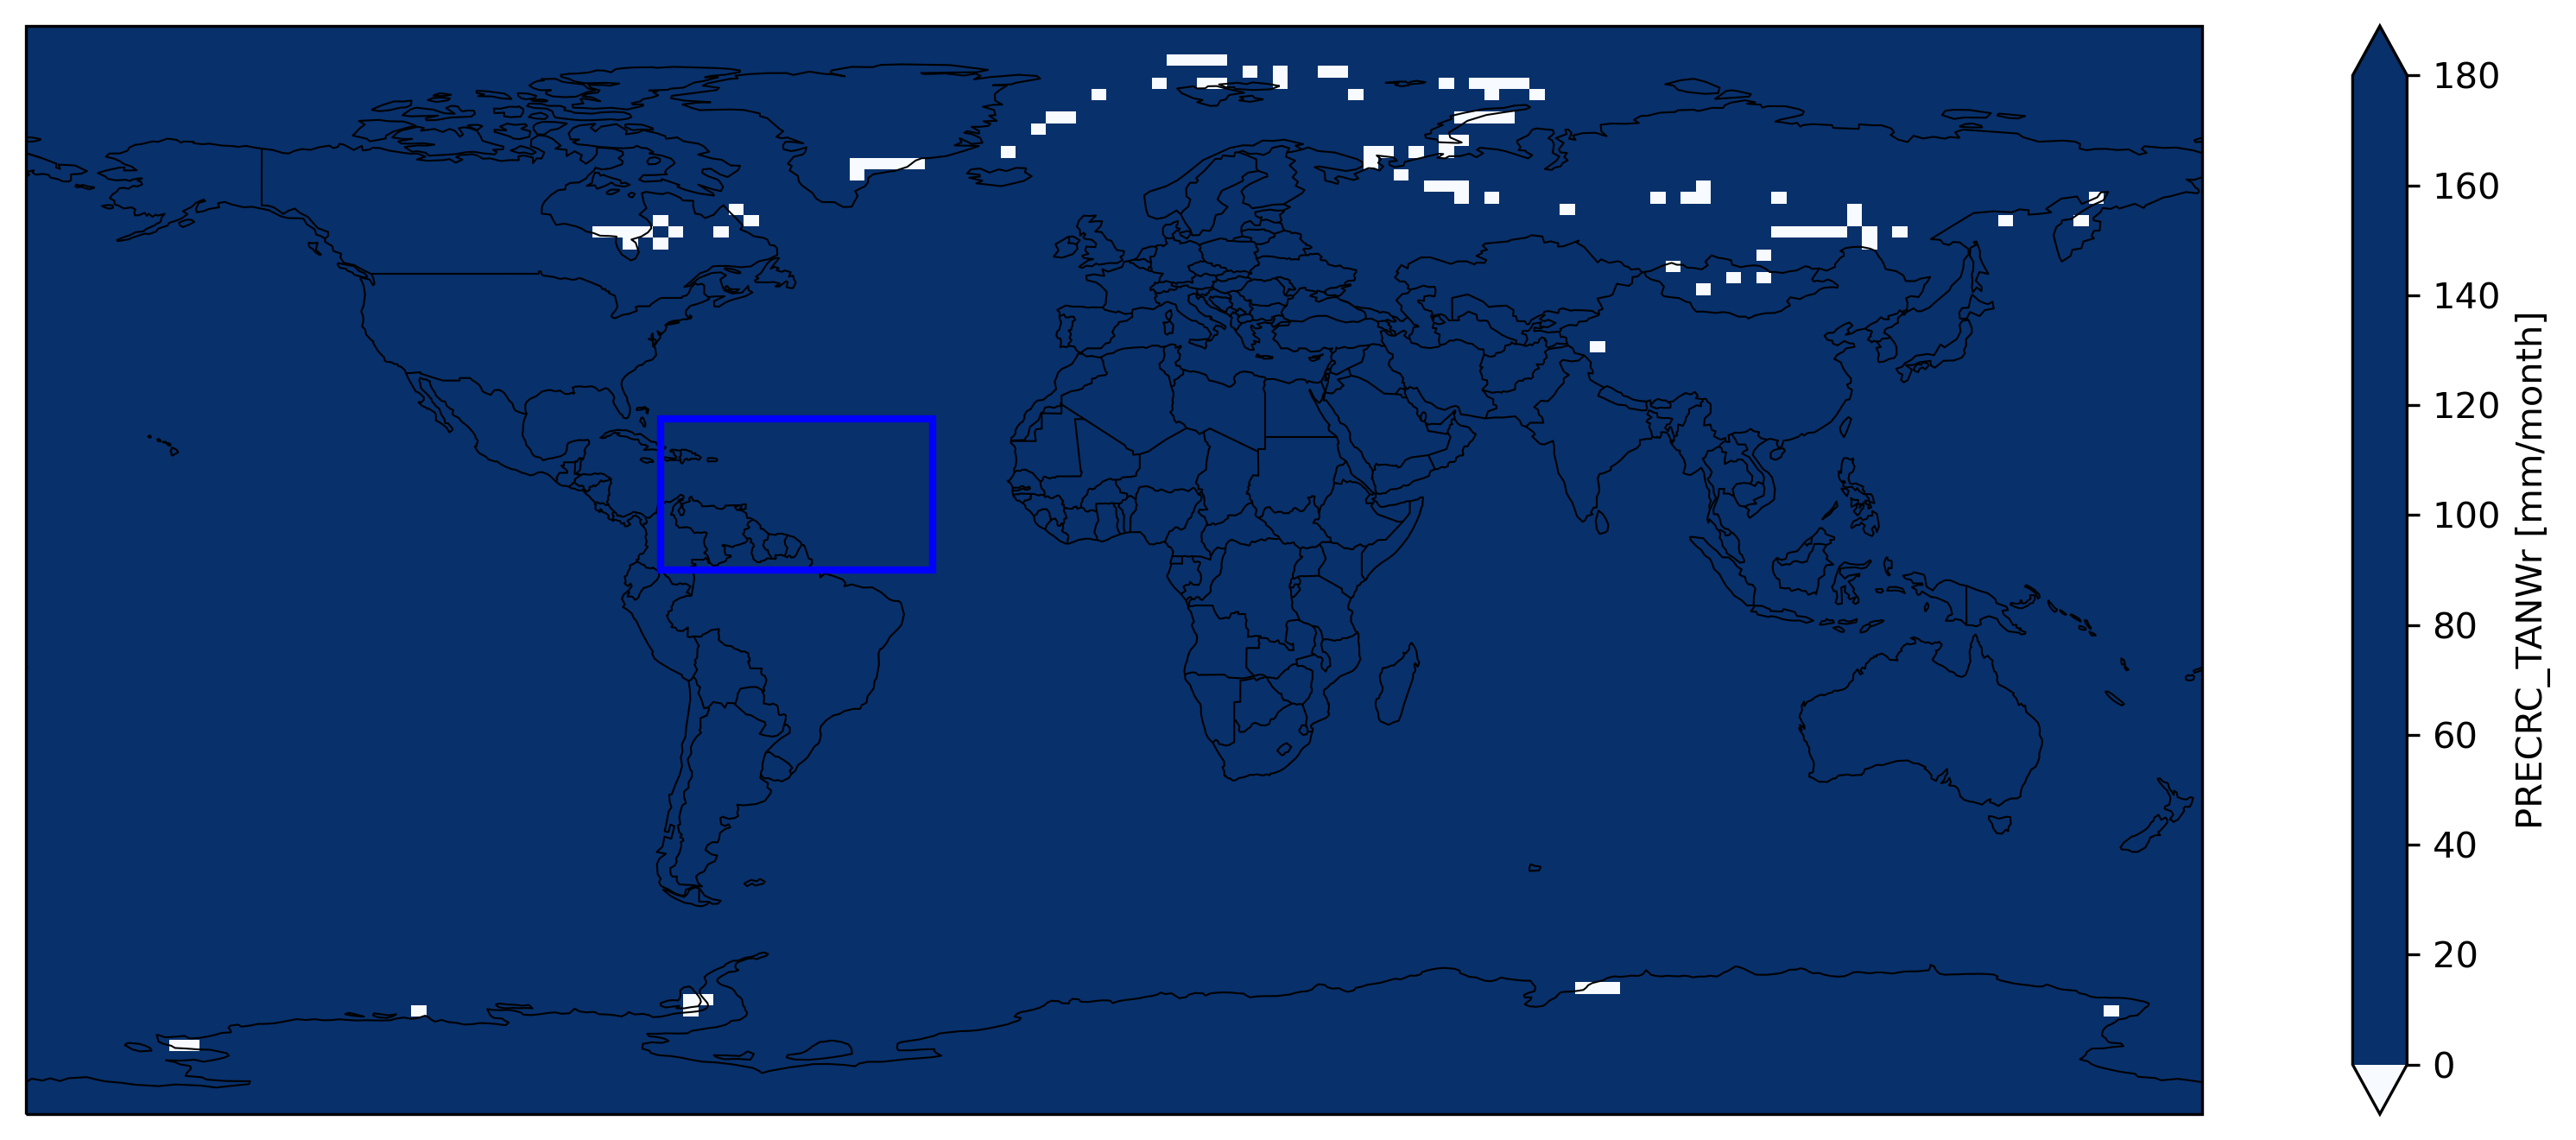

In [71]:
# Fcase minus Bcase clim January only
fig = plt.figure(figsize=(15,12),dpi=300)
ax = fig.add_subplot(212, projection=ccrs.PlateCarree())

# Add map features
ax.add_feature(cfeature.COASTLINE,linewidths=0.5)
ax.add_feature(cfeature.BORDERS,linewidths=0.5)

# Set extent
LatMin = -90
LatMax = 90
LonMin = -180
LonMax = 180
ax.set_extent([LonMin,LonMax,LatMin,LatMax],ccrs.PlateCarree())

cmap = mpl.cm.Blues
bounds = np.arange(0, 200, 20)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N, extend = 'both')

# Plot month of data
cntr = da_mm_month.plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), cmap=cmap, 
                                               add_colorbar=True, 
                                               norm=norm,
                                               add_labels=True)
ax.set_title('')
# 21. Tropical Atlantic NW
rlats = 0
rlatn = 25
rlonw = -75
rlone = -30
ax.add_patch(Rectangle((rlonw,rlats),abs(abs(rlonw)-abs(rlone)),abs(abs(rlatn)-abs(rlats)),
              linestyle='-',facecolor='none',edgecolor='blue',linewidth=2,zorder=2))
